In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error

In [2]:
df_res = pd.read_csv('data.csv')

In [3]:
# simulated data

df_att_ft = pd.read_csv('Data/Pois_FT_att.csv')
df_def_ft = pd.read_csv('Data/Pois_FT_def.csv')

df_c_ft = pd.read_csv('Data/Pois_FT_c.csv')
df_home_ft = pd.read_csv('Data/Pois_FT_home.csv')
c_ft = df_c_ft['x'][0]
home_ft = df_home_ft['x'][0]

In [4]:
df_att_2p = pd.read_csv('Data/Pois_2p_att.csv')
df_def_2p = pd.read_csv('Data/Pois_2p_def.csv')

df_c_2p = pd.read_csv('Data/Pois_2p_c.csv')
df_home_2p = pd.read_csv('Data/Pois_2p_home.csv')
c_2p = df_c_2p['x'][0]
home_2p = df_home_2p['x'][0]

In [5]:
df_att_3p = pd.read_csv('Data/Pois_3p_att.csv')
df_def_3p = pd.read_csv('Data/Pois_3p_def.csv')

df_c_3p = pd.read_csv('Data/Pois_3p_c.csv')
df_home_3p = pd.read_csv('Data/Pois_3p_home.csv')
c_3p = df_c_3p['x'][0]
home_3p = df_home_3p['x'][0]

### Cross plots

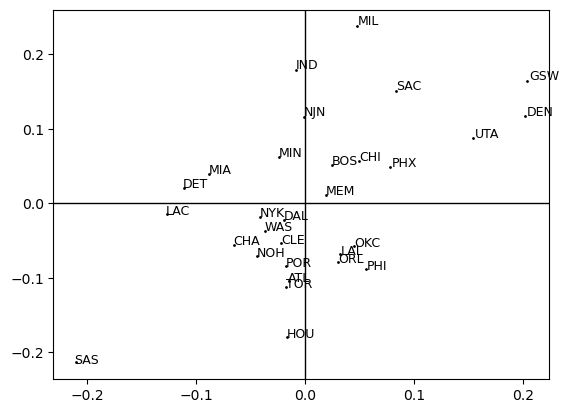

In [6]:
x = df_att_ft['x']
y = df_def_ft['x']
teams = sorted(df_res['home_team'].unique())

plt.scatter(x,y, s=1, c='black')
#plt.grid()
plt.axhline(0, c='black', linewidth = 1)
plt.axvline(0, c='black', linewidth = 1)
for i in range(len(teams)):
    x_hat = x[i]
    y_hat = y[i]
    plt.text(x_hat * (1 + 0.01), y_hat * (1 + 0.01) , teams[i], fontsize=9)


### For each game, estimate pts for home and away team, check who wins

In [7]:
corect_pred = 0
wins = np.zeros(30)
pred_wins = np.zeros(30)


for index, row in df_res.iterrows():
    print(f'Game number {index+1}')
    home_idx = row['home_code'] #- 1
    away_idx = row['away_code'] #- 1
    
    # this estimation is wrong (?)
    tot_ft_home = np.exp(df_att_ft['x'][home_idx] + df_def_ft['x'][away_idx] + c_ft + home_ft)
    tot_ft_away = np.exp(df_att_ft['x'][away_idx] + df_def_ft['x'][home_idx] + c_ft)

    tot_2p_home = np.exp(df_att_2p['x'][home_idx] + df_def_2p['x'][away_idx] + c_2p + home_ft)
    tot_2p_away = np.exp(df_att_2p['x'][away_idx] + df_def_2p['x'][home_idx] + c_2p)  

    tot_3p_home = np.exp(df_att_3p['x'][home_idx] + df_def_3p['x'][away_idx] + c_3p + home_ft)
    tot_3p_away = np.exp(df_att_3p['x'][away_idx] + df_def_3p['x'][home_idx] + c_3p)      

    home_pts = tot_ft_home + 2*tot_2p_home + 3*tot_3p_home
    away_pts = tot_ft_away + 2*tot_2p_away + 3*tot_3p_away

    print(f'home ponts: {home_pts}')
    print(f'away ponts: {away_pts}')

    if home_pts > away_pts :
        home_win = 1
        pred_wins[home_idx] +=1 
    else: pred_wins[away_idx] +=1
    if home_win == df_res['home_win'][index]:
        corect_pred += 1
        print('Predicted correctly', '\n')    

print(f'Predicted {corect_pred / len(df_res)} games')

for index, row in df_res.iterrows():
    home_idx = row['home_code']
    away_idx = row['away_code']
    if df_res['home_win'][index] == 1:
        wins[home_idx] +=1 
    else: wins[away_idx] +=1

Game number 1
home ponts: 97.03156388937612
away ponts: 92.28428778362729
Predicted correctly 

Game number 2
home ponts: 105.04881019078707
away ponts: 96.86817721386052
Predicted correctly 

Game number 3
home ponts: 107.72073755199534
away ponts: 100.68392118489746
Predicted correctly 

Game number 4
home ponts: 110.0373183275127
away ponts: 104.93837807298559
Predicted correctly 

Game number 5
home ponts: 101.85811416684604
away ponts: 91.42274915299117
Game number 6
home ponts: 99.13601739227597
away ponts: 107.97103153857839
Game number 7
home ponts: 106.77164392279097
away ponts: 105.18356809081713
Game number 8
home ponts: 100.79009652428847
away ponts: 101.05743964929411
Game number 9
home ponts: 111.32810036605376
away ponts: 100.92771605260442
Predicted correctly 

Game number 10
home ponts: 108.27020051429565
away ponts: 103.29411229493977
Predicted correctly 

Game number 11
home ponts: 101.65979810921993
away ponts: 100.44141506884114
Game number 12
home ponts: 109.21317

In [8]:
wins

array([47., 62., 35., 41., 66., 50., 54., 39., 29., 53., 36., 19., 65.,
       24., 43., 34., 24., 34., 49., 32., 23., 59., 41., 46., 54., 17.,
       54., 33., 48., 19.])

In [9]:
pred_wins

array([45., 67., 36., 39., 72., 48., 52., 38., 30., 54., 38., 13., 63.,
       19., 40., 36., 26., 35., 48., 34., 18., 63., 39., 49., 56., 15.,
       55., 34., 51., 17.])